In [17]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Data/publication_data.csv', header = None)

In [8]:
df.columns = ['cell_index', 'dendrite_index', 'spine_index', 'im_session', 'sipne_I', 'shape_1', 'shape_2', 'dist', 'x_CM', 'y_CM', 'x_den', 'y_den', 'z_spine']

In [36]:
index = np.where((df['cell_index'] == 1) & (df['dendrite_index'] == 2)&(df['spine_index'] == 3))

In [41]:
index = np.where(df['im_session'] == 1)

In [56]:
g = 0.37/df.iloc[index]['shape_param'].mean()

In [57]:
g

0.8342259488681096

In [38]:
def compute_shape(row):
    shape = (row['shape_1'] - row['shape_2'])/(row['shape_1'] + row['shape_2'])
    return shape

In [39]:
df['shape_param'] = df.apply (lambda row: compute_shape(row), axis=1)

In [47]:
(df.iloc[index]['shape_param'].his)

AttributeError: 'Series' object has no attribute 'his'

array([[<AxesSubplot:title={'center':'shape_param'}>]], dtype=object)

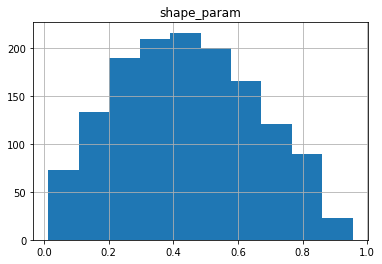

In [54]:
pd.DataFrame.hist(df.iloc[index], 'shape_param')